**Imports**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

**Import Dataset & Visualization**

In [2]:
data=pd.read_csv("indian liver.csv")

In [3]:
data.head(3)

Age  Gender  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
0   65  Female              0.7               0.1                   187   
1   62    Male             10.9               5.5                   699   
2   62    Male              7.3               4.1                   490   

   Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
0                        16                          18             6.8   
1                        64                         100             7.5   
2                        60                          68             7.0   

   Albumin  Albumin_and_Globulin_Ratio  Dataset  
0      3.3                        0.90        1  
1      3.2                        0.74        1  
2      3.3                        0.89        1

In [4]:
data.shape

(583, 11)

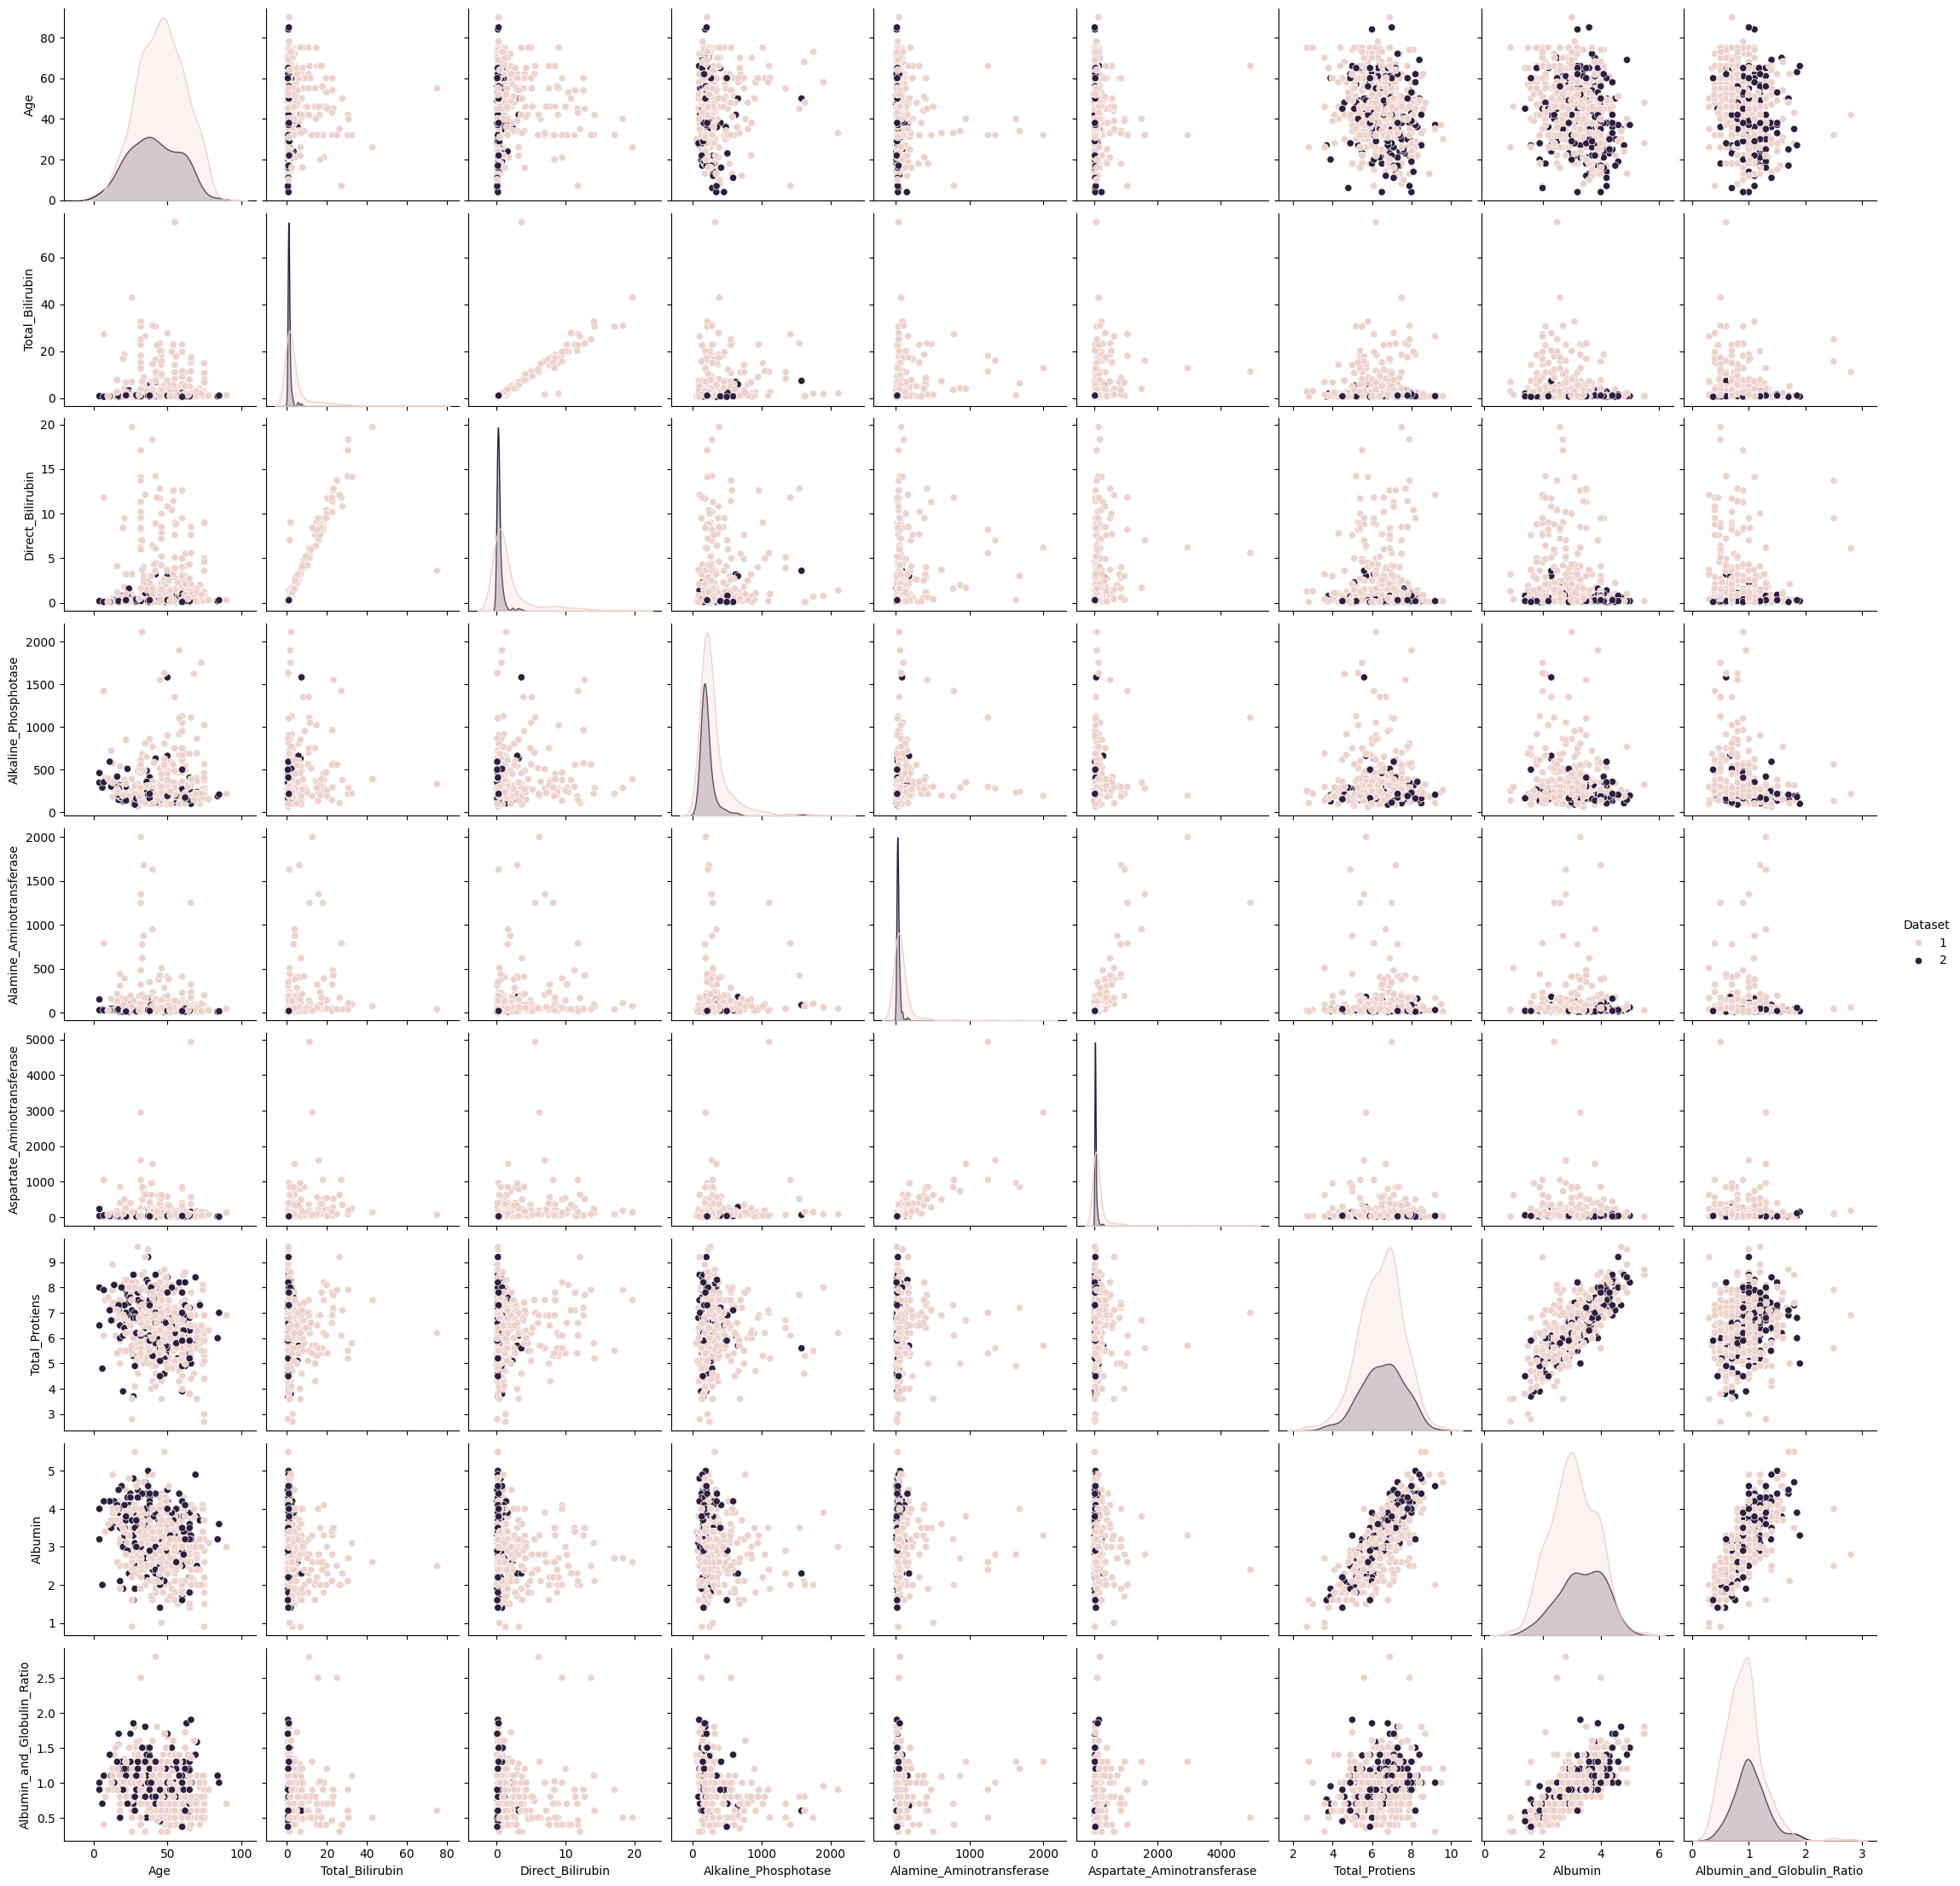

In [5]:
sns.pairplot(data=data, hue='Dataset')

**Correleation Heatmap**

[]

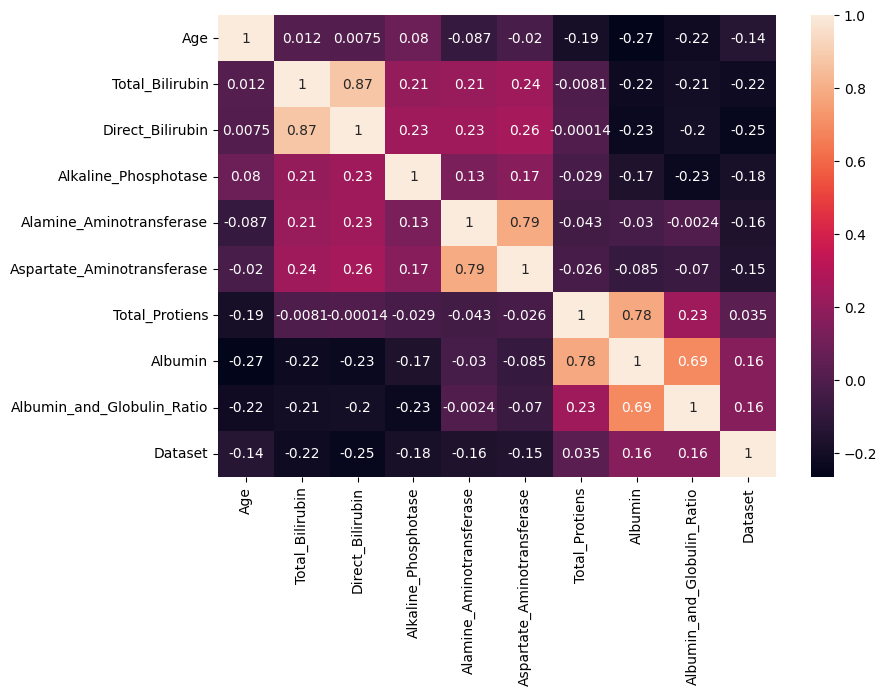

In [6]:
corr=data.corr(numeric_only=True)
plt.figure(figsize=(9,6))
sns.heatmap(corr, annot=True)
plt.plot()

# **Dataset Preprocessing**

**Handling Null Values**

In [7]:
data.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

<Axes: >

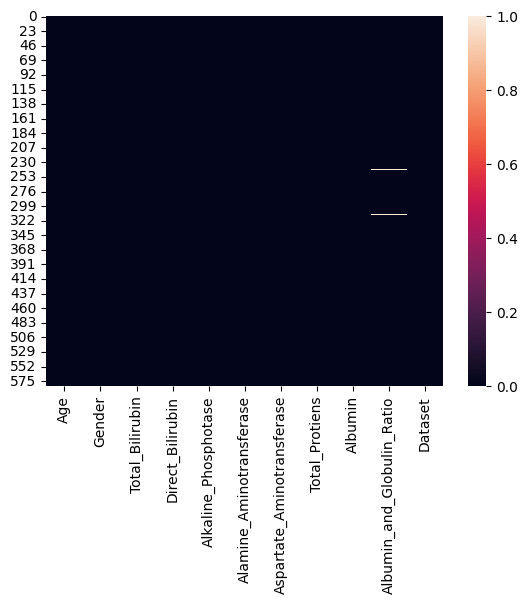

In [8]:
sns.heatmap(data.isnull())

In [9]:
data.Albumin_and_Globulin_Ratio.fillna(method='bfill', inplace=True)

C:\Users\abuba\AppData\Local\Temp\ipykernel_13176\3520515922.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data.Albumin_and_Globulin_Ratio.fillna(method='bfill', inplace=True)
C:\Users\abuba\AppData\Local\Temp\ipykernel_13176\3520515922.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.Albumin_and_Globulin_Ratio.fillna(method='bfill', inplace=True)


In [10]:
data.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

**Encode Categorical Features**

In [11]:
from sklearn.preprocessing import LabelEncoder

In [12]:
lb=LabelEncoder()

In [13]:
data['Gender']=pd.DataFrame(lb.fit_transform(data['Gender']), columns=['Gender'])

**Outlier Removal**

In [14]:
q1 = data["Age"].quantile(0.25)
q3 = data["Age"].quantile(0.75)
IQR = q3 - q1

min_range = q1 - 1.5 * IQR
max_range = q3 + 1.5 * IQR

data = data[(data["Age"] >= min_range) & (data["Age"] <= max_range)]

In [15]:
q1 = data["Gender"].quantile(0.25)
q3 = data["Gender"].quantile(0.75)
IQR = q3 - q1

min_range = q1 - 1.5 * IQR
max_range = q3 + 1.5 * IQR

data = data[(data["Gender"] >= min_range) & (data["Gender"] <= max_range)]

In [16]:
q1 = data["Total_Bilirubin"].quantile(0.25)
q3 = data["Total_Bilirubin"].quantile(0.75)
IQR = q3 - q1

min_range = q1 - 1.5 * IQR
max_range = q3 + 1.5 * IQR

data = data[(data["Total_Bilirubin"] >= min_range) & (data["Total_Bilirubin"] <= max_range)]

In [17]:
q1 = data["Direct_Bilirubin"].quantile(0.25)
q3 = data["Direct_Bilirubin"].quantile(0.75)
IQR = q3 - q1

min_range = q1 - 1.5 * IQR
max_range = q3 + 1.5 * IQR

data = data[(data["Direct_Bilirubin"] >= min_range) & (data["Direct_Bilirubin"] <= max_range)]

In [18]:
q1 = data["Alkaline_Phosphotase"].quantile(0.25)
q3 = data["Alkaline_Phosphotase"].quantile(0.75)
IQR = q3 - q1

min_range = q1 - 1.5 * IQR
max_range = q3 + 1.5 * IQR

data = data[(data["Alkaline_Phosphotase"] >= min_range) & (data["Alkaline_Phosphotase"] <= max_range)]

In [19]:
q1 = data["Alamine_Aminotransferase"].quantile(0.25)
q3 = data["Alamine_Aminotransferase"].quantile(0.75)
IQR = q3 - q1

min_range = q1 - 1.5 * IQR
max_range = q3 + 1.5 * IQR

data = data[(data["Alamine_Aminotransferase"] >= min_range) & (data["Alamine_Aminotransferase"] <= max_range)]

In [20]:
q1 = data["Aspartate_Aminotransferase"].quantile(0.25)
q3 = data["Aspartate_Aminotransferase"].quantile(0.75)
IQR = q3 - q1

min_range = q1 - 1.5 * IQR
max_range = q3 + 1.5 * IQR

data = data[(data["Aspartate_Aminotransferase"] >= min_range) & (data["Aspartate_Aminotransferase"] <= max_range)]

In [21]:
q1 = data["Total_Protiens"].quantile(0.25)
q3 = data["Total_Protiens"].quantile(0.75)
IQR = q3 - q1

min_range = q1 - 1.5 * IQR
max_range = q3 + 1.5 * IQR

data = data[(data["Total_Protiens"] >= min_range) & (data["Total_Protiens"] <= max_range)]

In [22]:
q1 = data["Albumin"].quantile(0.25)
q3 = data["Albumin"].quantile(0.75)
IQR = q3 - q1

min_range = q1 - 1.5 * IQR
max_range = q3 + 1.5 * IQR

data = data[(data["Albumin"] >= min_range) & (data["Albumin"] <= max_range)]

In [23]:
q1 = data["Albumin_and_Globulin_Ratio"].quantile(0.25)
q3 = data["Albumin_and_Globulin_Ratio"].quantile(0.75)
IQR = q3 - q1

min_range = q1 - 1.5 * IQR
max_range = q3 + 1.5 * IQR

data = data[(data["Albumin_and_Globulin_Ratio"] >= min_range) & (data["Albumin_and_Globulin_Ratio"] <= max_range)]

**Graph After Data Preprocessing**

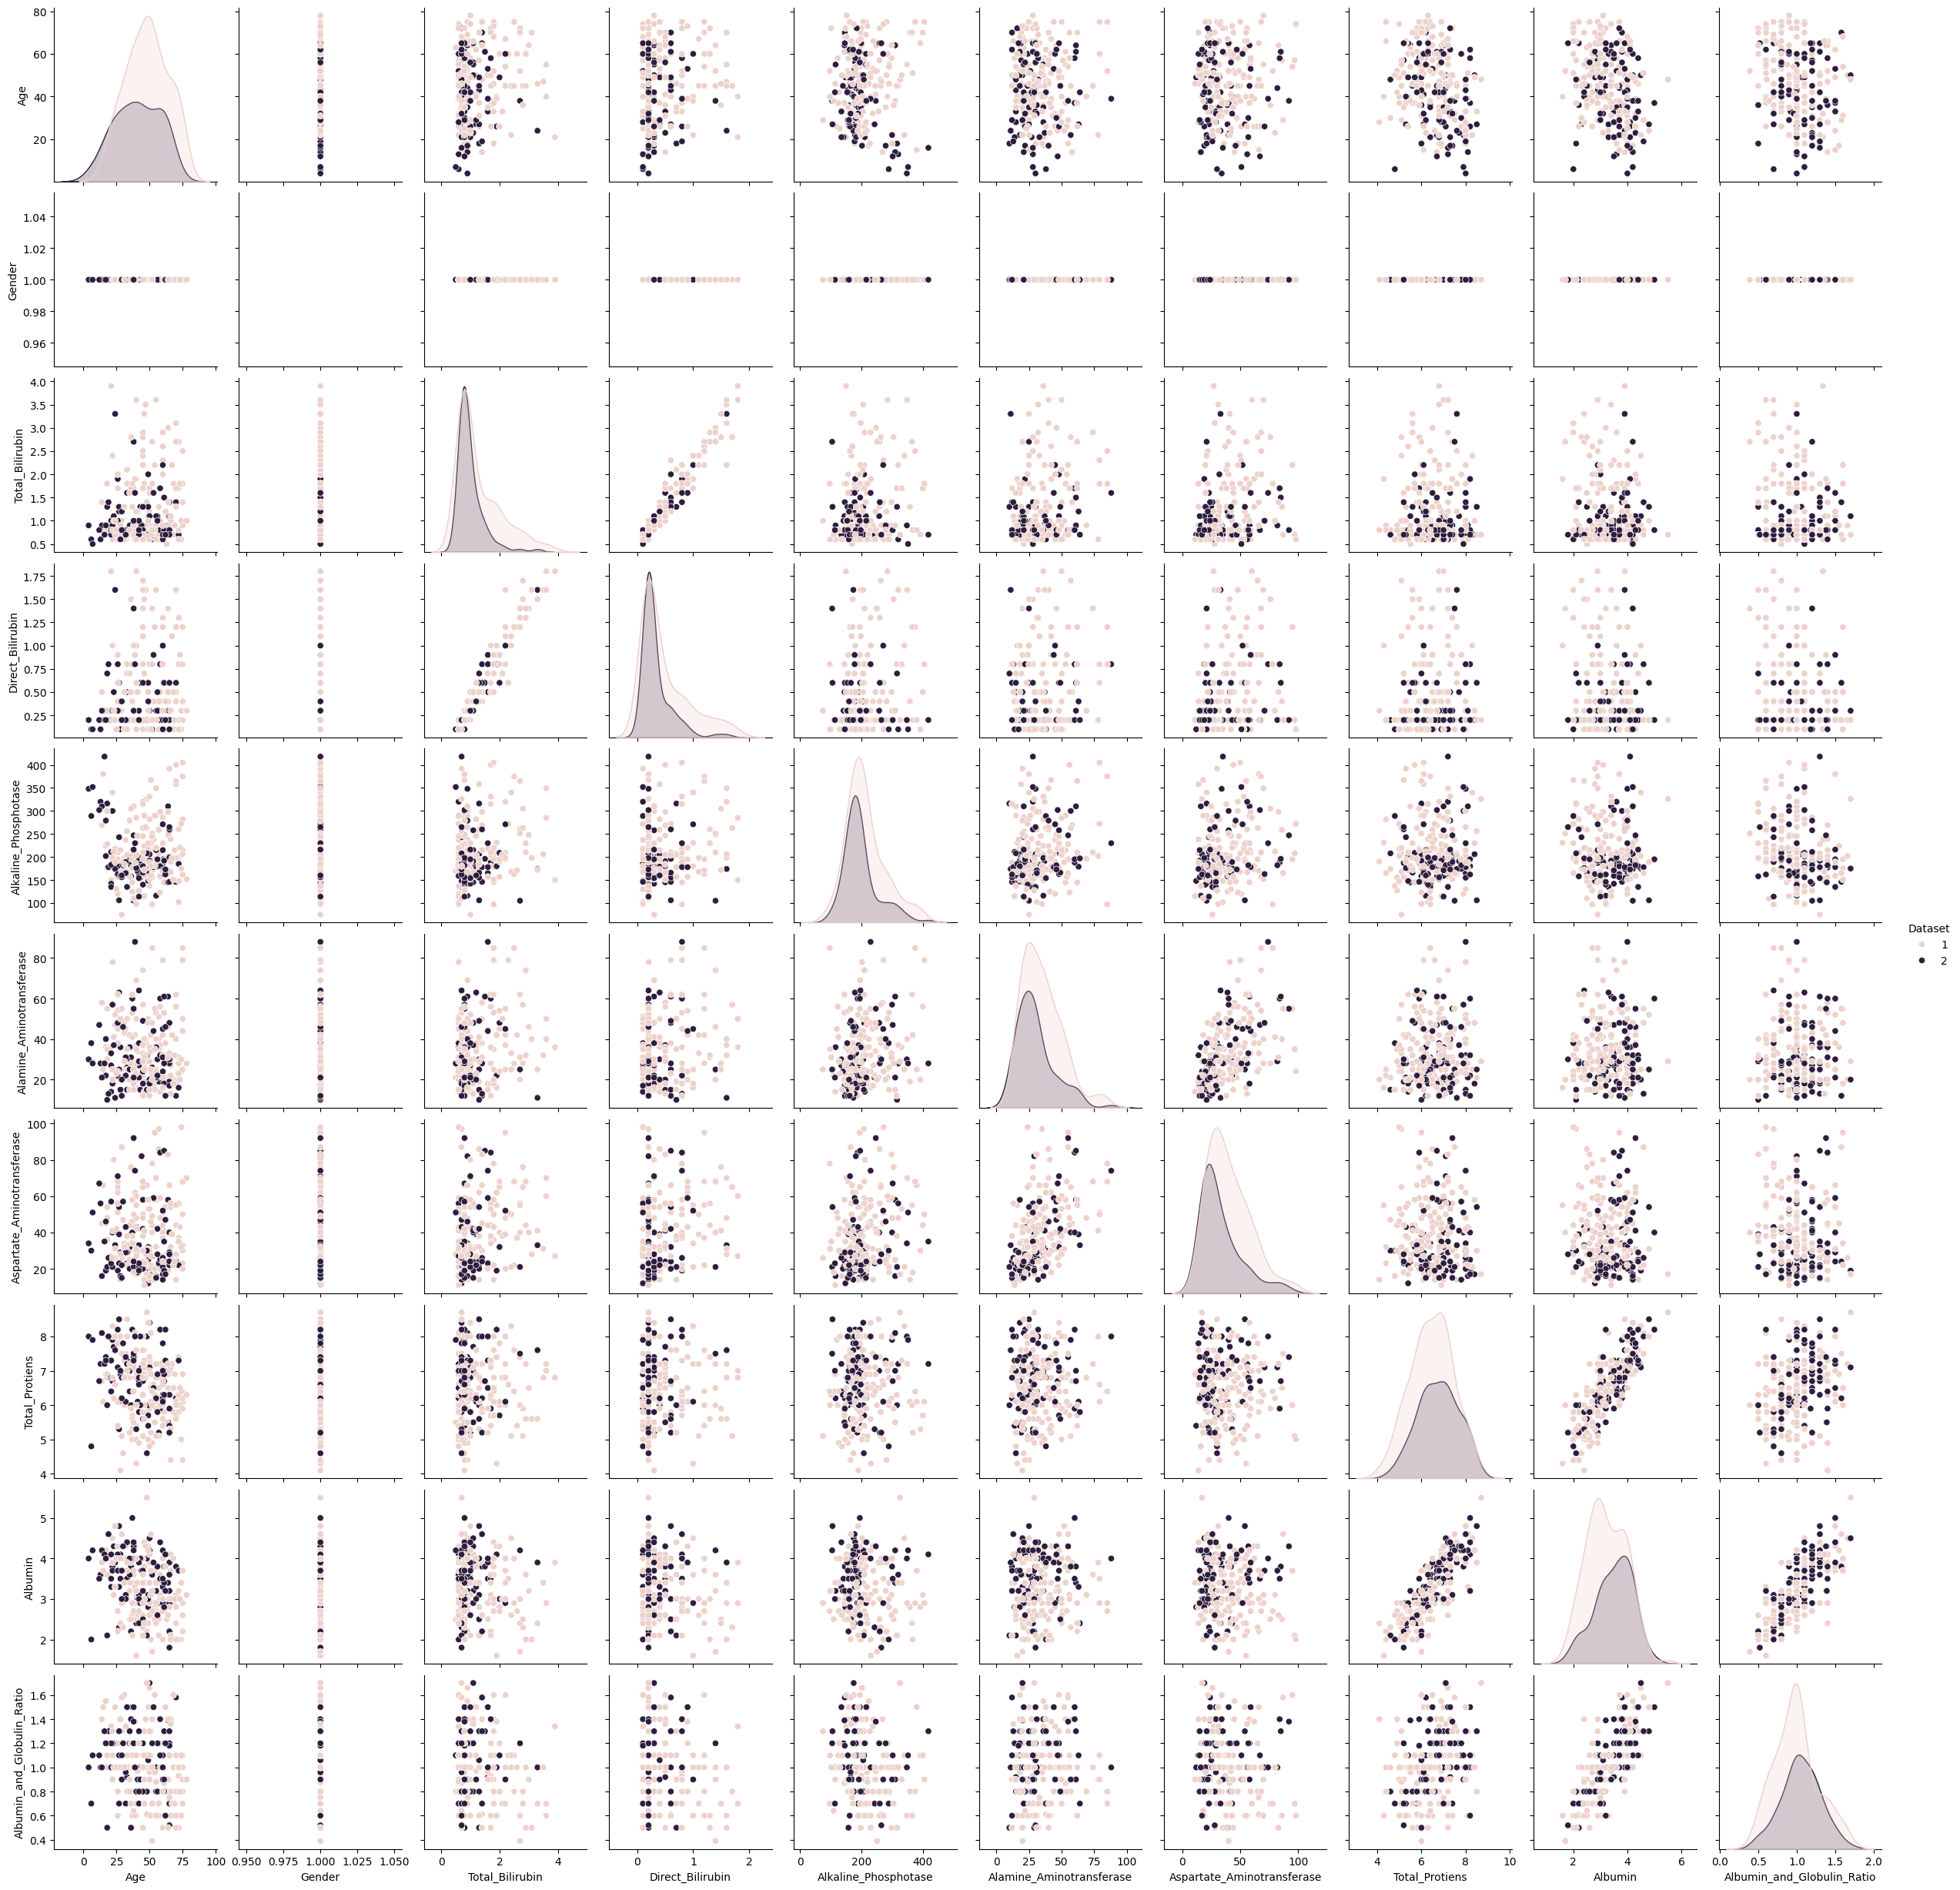

In [24]:
sns.pairplot(data=data, hue="Dataset")

**Data Splitting**

In [25]:
x=data.iloc[:, :-1]
y=data["Dataset"]

In [26]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2, random_state=42)

**Feature Scaling**

In [27]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [28]:
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

**Model Training**

**Decision Tree**

In [29]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

In [30]:
dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [31]:
y_dt_pred=dt.predict(x_test)

In [32]:
dt_accuracy=accuracy_score(y_test, y_dt_pred)

In [33]:
dt_report=classification_report(y_test, y_dt_pred, output_dict=True)

In [34]:
cm_dt=confusion_matrix(y_test, y_dt_pred)

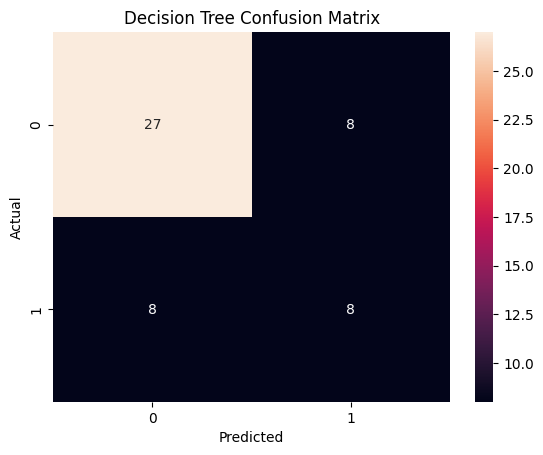

In [35]:
sns.heatmap(cm_dt, annot=True)
plt.title("Decision Tree Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

# Image ko save karna
plt.savefig("confusion_matrix_dt.png", dpi=300, bbox_inches='tight')  # filename, resolution, layout tight

In [36]:
from sklearn.metrics import roc_curve, auc
dt_prob=dt.predict_proba(x_test)[:, :1]
fpr_dt, tpr_dt, thresholds_dt=roc_curve(y_test, dt_prob, pos_label=2)
roc_auc_dt=auc(fpr_dt, tpr_dt)

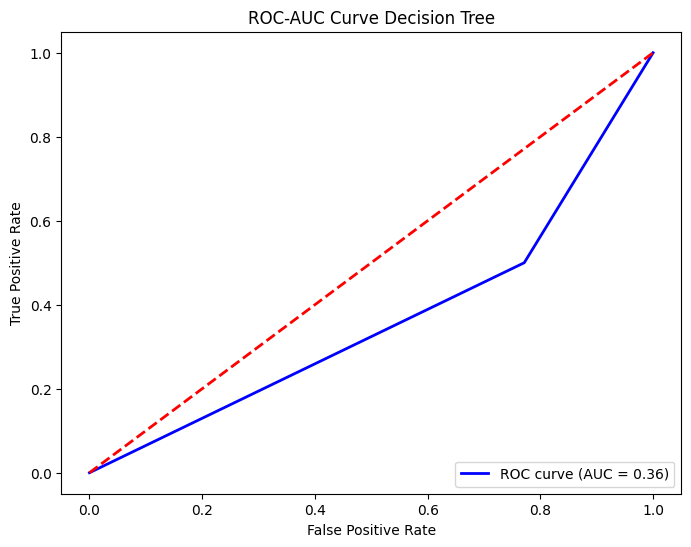

In [37]:
plt.figure(figsize=(8,6))
plt.plot(fpr_dt, tpr_dt, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc_dt)
plt.plot([0,1], [0,1], color='red', lw=2, linestyle='--')  
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curve Decision Tree')
plt.legend(loc='lower right')
plt.savefig("ROC_DT.png", dpi=300, bbox_inches='tight')

plt.show()


**Random Forest**

In [38]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

In [39]:
rf.fit(x_train, y_train)

RandomForestClassifier()

In [40]:
y_rf_predict=rf.predict(x_test)

In [41]:
rf_accuracy=accuracy_score(y_test, y_rf_predict)

In [42]:
rf_report=classification_report(y_test, y_rf_predict, output_dict=True)

In [43]:
cm_rf=confusion_matrix(y_test, y_rf_predict)

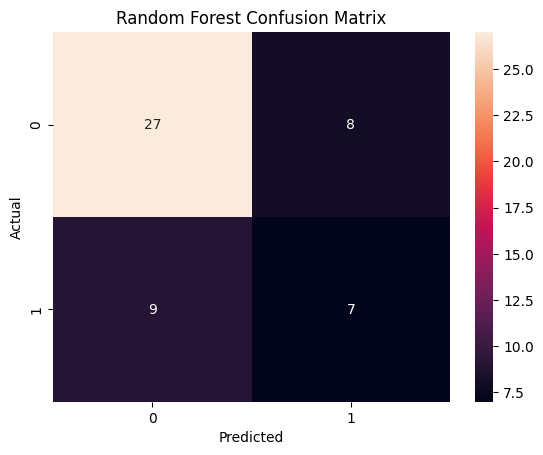

In [44]:
sns.heatmap(cm_rf, annot=True)
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

# Image ko save karna
plt.savefig("confusion_matrix_rf_bakar.png", dpi=300, bbox_inches='tight')  # filename, resolution, layout tight

In [171]:
rf_prob = rf.predict_proba(x_test)[:, 1]
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, rf_prob, pos_label=2)
roc_auc_rf = auc(fpr_rf, tpr_rf)

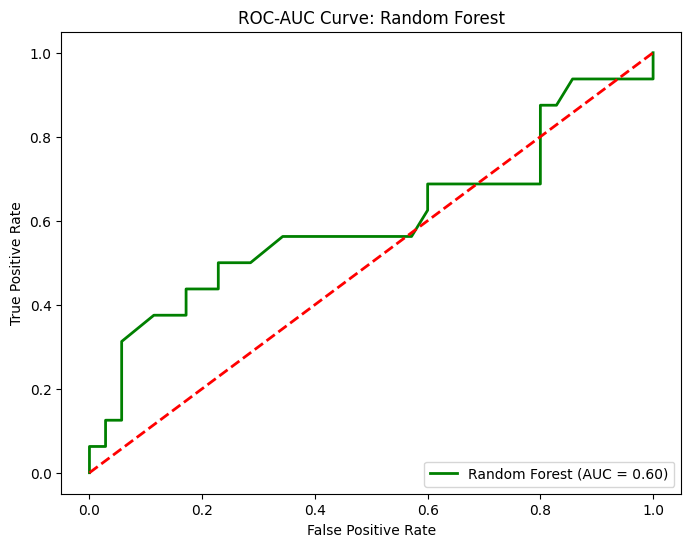

In [173]:
plt.figure(figsize=(8,6))
plt.plot(fpr_rf, tpr_rf, color='green', lw=2, label='Random Forest (AUC = %0.2f)' % roc_auc_rf)
plt.plot([0,1], [0,1], color='red', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curve: Random Forest')
plt.legend(loc='lower right')
plt.savefig("ROC_rf.png", dpi=300, bbox_inches='tight')

plt.show()

**Logistic Regression**

In [174]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [175]:
lr.fit(x_train, y_train)

LogisticRegression()

In [176]:
lr_predict=lr.predict(x_test)

In [177]:
lr_accuracy=accuracy_score(y_test, lr_predict)

In [178]:
lr_report=classification_report(y_test, lr_predict, output_dict=True)

In [179]:
cm_lr=confusion_matrix(y_test, lr_predict)

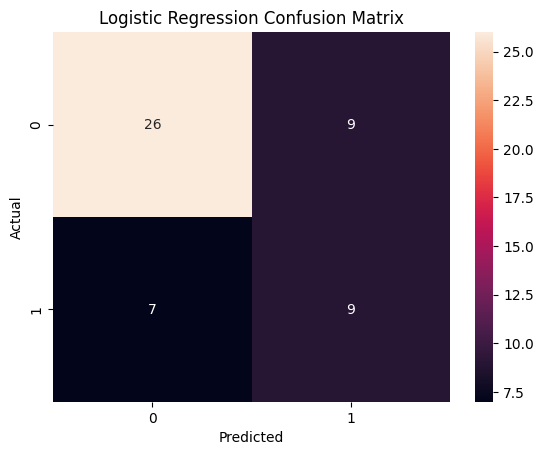

In [180]:
sns.heatmap(cm_lr, annot=True)
plt.title("Logistic Regression Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

# Image ko save karna
plt.savefig("confusion_matrix_lr.png", dpi=300, bbox_inches='tight')  # filename, resolution, layout tight

In [181]:
# Logistic Regression
lr_prob = lr.predict_proba(x_test)[:, 1]
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, lr_prob, pos_label=2)
roc_auc_lr = auc(fpr_lr, tpr_lr)

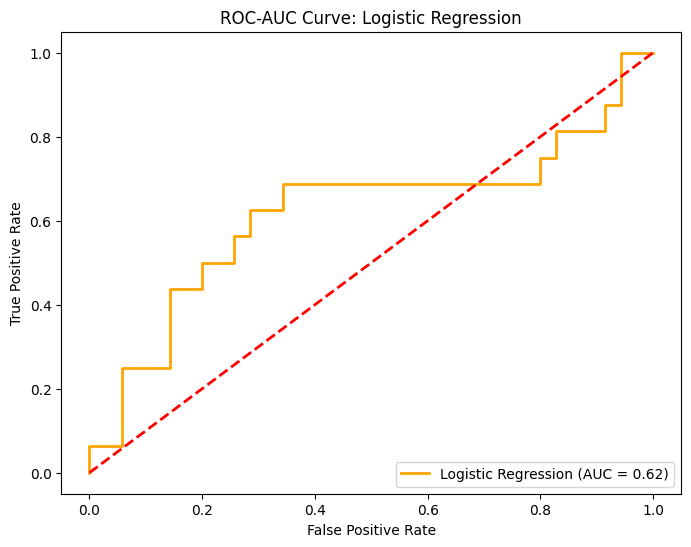

In [182]:
plt.figure(figsize=(8,6))
plt.plot(fpr_lr, tpr_lr, color='orange', lw=2, label='Logistic Regression (AUC = %0.2f)' % roc_auc_lr)
plt.plot([0,1], [0,1], color='red', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curve: Logistic Regression')
plt.legend(loc='lower right')
plt.savefig("ROC_lr.png", dpi=300, bbox_inches='tight')

plt.show()

**K-Nearest Neighbors (KNN)**

In [183]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()

In [184]:
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [185]:
knn_predict=knn.predict(x_test)

In [186]:
knn_accuracy=accuracy_score(y_test, knn_predict)

In [187]:
knn_report=classification_report(y_test, knn_predict, output_dict=True)

In [188]:
cm_knn=confusion_matrix(y_test, knn_predict)

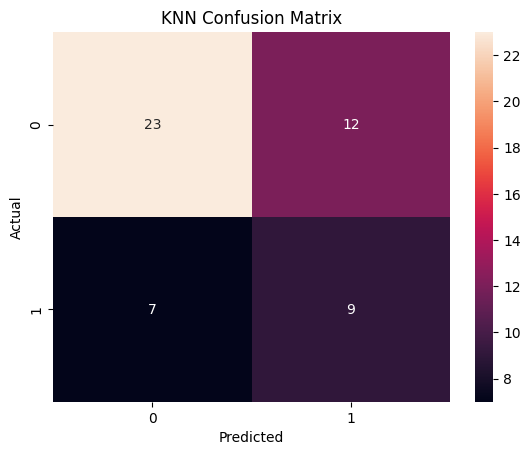

In [189]:
sns.heatmap(cm_knn, annot=True)
plt.title("KNN Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

# Image ko save karna
plt.savefig("confusion_matrix_knn.png", dpi=300, bbox_inches='tight')  # filename, resolution, layout tight

In [190]:
knn_prob = knn.predict_proba(x_test)[:, 1]
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, knn_prob, pos_label=2)
roc_auc_knn = auc(fpr_knn, tpr_knn)

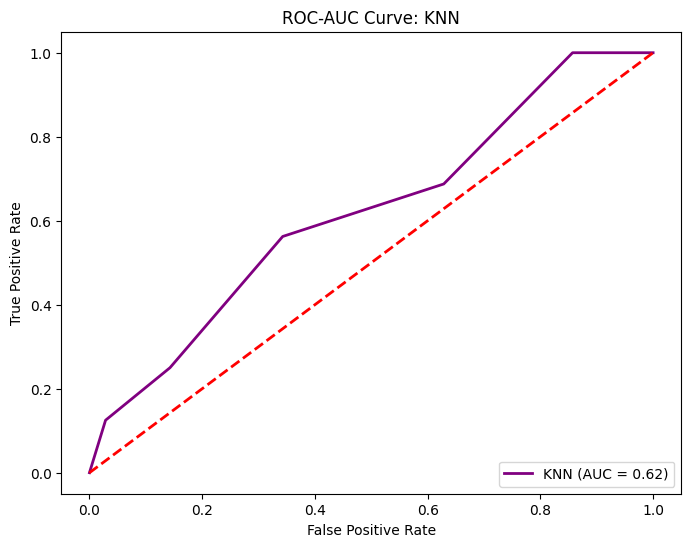

In [192]:
plt.figure(figsize=(8,6))
plt.plot(fpr_knn, tpr_knn, color='purple', lw=2, label='KNN (AUC = %0.2f)' % roc_auc_knn)
plt.plot([0,1], [0,1], color='red', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curve: KNN')
plt.legend(loc='lower right')
plt.savefig("ROC_knn.png", dpi=300, bbox_inches='tight')

plt.show()

**Support Vector Machine (SVM)**

In [193]:
from sklearn.svm import SVC
svm=SVC(probability=True)

In [194]:
svm.fit(x_train, y_train)

SVC(probability=True)

In [195]:
svm_predict=svm.predict(x_test)

In [196]:
svm_accuracy=accuracy_score(y_test, svm_predict)

In [197]:
svm_report=classification_report(y_test, svm_predict, output_dict=True)

In [198]:
cm_svm=confusion_matrix(y_test, svm_predict)

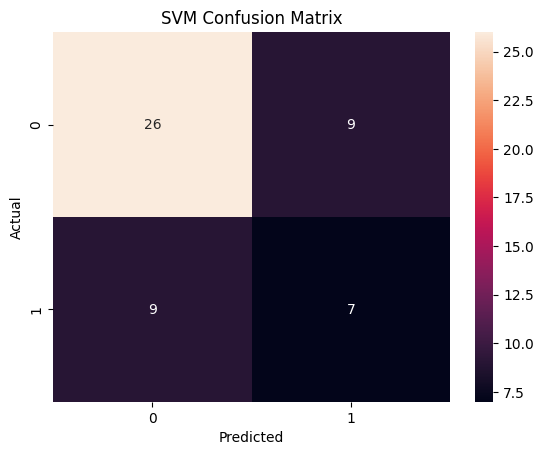

In [199]:
sns.heatmap(cm_svm, annot=True)
plt.title("SVM Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

# Image ko save karna
plt.savefig("confusion_matrix_svm.png", dpi=300, bbox_inches='tight')  # filename, resolution, layout tight

In [200]:
svm_prob = svm.predict_proba(x_test)[:, 1]
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, svm_prob, pos_label=2)
roc_auc_svm = auc(fpr_svm, tpr_svm)

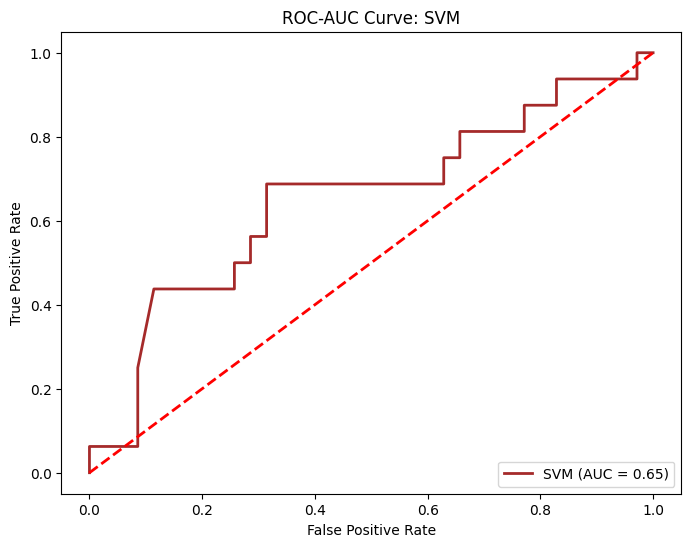

In [201]:
plt.figure(figsize=(8,6))
plt.plot(fpr_svm, tpr_svm, color='brown', lw=2, label='SVM (AUC = %0.2f)' % roc_auc_svm)
plt.plot([0,1], [0,1], color='red', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curve: SVM')
plt.legend(loc='lower right')
plt.savefig("ROC_svm.png", dpi=300, bbox_inches='tight')

plt.show()

**Naïve Bayes**

In [202]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()

In [203]:
nb.fit(x_train, y_train)

GaussianNB()

In [204]:
nb_predict=nb.predict(x_test)

In [205]:
nb_accuracy=accuracy_score(y_test, nb_predict)

In [206]:
nb_report=classification_report(y_test, nb_predict, output_dict=True)

In [207]:
cm_nb=confusion_matrix(y_test, nb_predict)

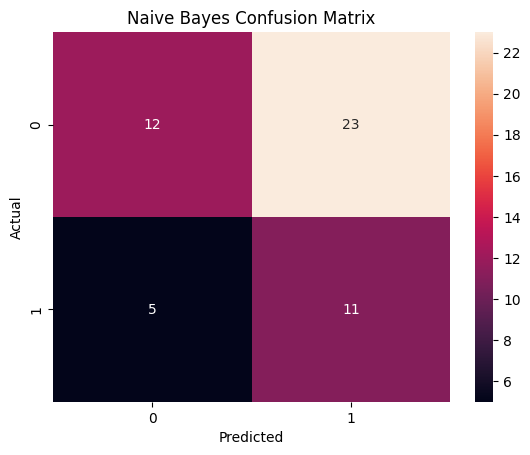

In [208]:
sns.heatmap(cm_nb, annot=True)
plt.title("Naive Bayes Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

# Image ko save karna
plt.savefig("confusion_matrix_nb.png", dpi=300, bbox_inches='tight')  # filename, resolution, layout tight

In [209]:
nb_prob = nb.predict_proba(x_test)[:, 1]
fpr_nb, tpr_nb, thresholds_nb = roc_curve(y_test, nb_prob, pos_label=2)
roc_auc_nb = auc(fpr_nb, tpr_nb)

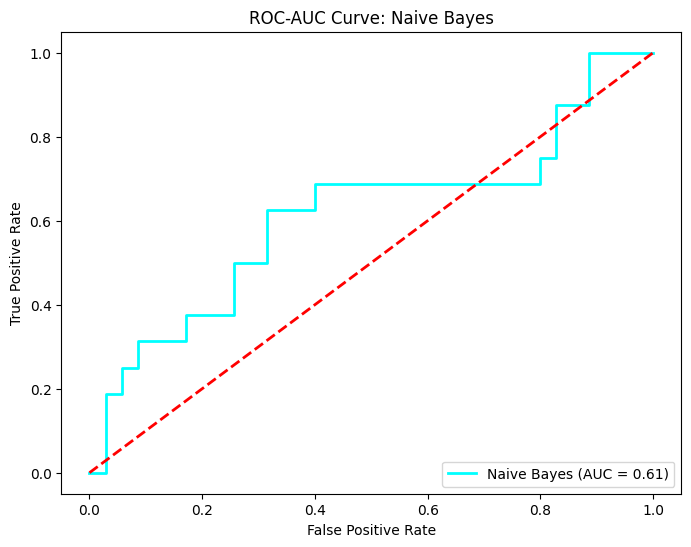

In [211]:
plt.figure(figsize=(8,6))
plt.plot(fpr_nb, tpr_nb, color='cyan', lw=2, label='Naive Bayes (AUC = %0.2f)' % roc_auc_nb)
plt.plot([0,1], [0,1], color='red', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curve: Naive Bayes')
plt.legend(loc='lower right')
plt.savefig("ROC_nb.png", dpi=300, bbox_inches='tight')

plt.show()

# **Evaluation of Models With Preprocessing**

In [212]:
import pandas as pd

comparison = pd.DataFrame({
    "Model": ["DT", "RF", "LR", "KNN", "SVM", "NB"],
    "Precision": [
        dt_report["weighted avg"]["precision"],
        rf_report["weighted avg"]["precision"],
        lr_report["weighted avg"]["precision"],
        knn_report["weighted avg"]["precision"],
        svm_report["weighted avg"]["precision"],
        nb_report["weighted avg"]["precision"]
    ],
    "Recall": [
        dt_report["weighted avg"]["recall"],
        rf_report["weighted avg"]["recall"],
        lr_report["weighted avg"]["recall"],
        knn_report["weighted avg"]["recall"],
        svm_report["weighted avg"]["recall"],
        nb_report["weighted avg"]["recall"]
    ],
    "F1-Score": [
        dt_report["weighted avg"]["f1-score"],
        rf_report["weighted avg"]["f1-score"],
        lr_report["weighted avg"]["f1-score"],
        knn_report["weighted avg"]["f1-score"],
        svm_report["weighted avg"]["f1-score"],
        nb_report["weighted avg"]["f1-score"]
    ],
    "Accuracy": [
        dt_report["accuracy"],
        rf_report["accuracy"],
        lr_report["accuracy"],
        knn_report["accuracy"],
        svm_report["accuracy"],
        nb_report["accuracy"]
    ]
})

In [213]:
comparison["ROC-AUC"] = [
    roc_auc_dt,
    roc_auc_rf,
    roc_auc_lr,
    roc_auc_knn,
    roc_auc_svm,
    roc_auc_nb
]

**Comparison Table With Preprocessing**

In [214]:
comparison

Model  Precision    Recall  F1-Score  Accuracy   ROC-AUC
0    DT   0.672434  0.666667  0.669302  0.666667  0.378571
1    RF   0.686275  0.686275  0.686275  0.686275  0.598214
2    LR   0.697564  0.686275  0.690888  0.686275  0.617857
3   KNN   0.660598  0.627451  0.638294  0.627451  0.618750
4   SVM   0.647059  0.647059  0.647059  0.647059  0.650893
5    NB   0.585928  0.450980  0.454781  0.450980  0.614286

# **Model Training Without Preprocessing**

**Again import Raw data**

In [215]:
r_data=pd.read_csv("indian liver.csv")

In [216]:
r_data['Gender']=pd.DataFrame(lb.fit_transform(r_data['Gender']), columns=['Gender'])

In [217]:
r_data.Albumin_and_Globulin_Ratio.fillna(method='bfill', inplace=True)

C:\Users\abuba\AppData\Local\Temp\ipykernel_3872\987819154.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  r_data.Albumin_and_Globulin_Ratio.fillna(method='bfill', inplace=True)
C:\Users\abuba\AppData\Local\Temp\ipykernel_3872\987819154.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  r_data.Albumin_and_Globulin_Ratio.fillna(method='bfill', inplace=True)


**Data Splitting**

In [218]:
x_r=r_data.iloc[:, :-1]
y_r=r_data["Dataset"]

In [219]:
from sklearn.model_selection import train_test_split
x_train_raw, x_test_raw, y_train_raw, y_test_raw=train_test_split(x_r, y_r, test_size=0.2, random_state=42)

# **Model Training on Raw Dataset**

**Decision tree**

In [220]:
dt_r=DecisionTreeClassifier()

In [221]:
dt_r.fit(x_train_raw, y_train_raw)

DecisionTreeClassifier()

In [222]:
dt_predict_raw=dt_r.predict(x_test_raw)

In [223]:
dt_accuracy_raw=accuracy_score(y_test_raw, dt_predict_raw)

In [224]:
dt_report_raw=classification_report(y_test_raw, dt_predict_raw, output_dict=True)

In [225]:
cm_dt_raw=confusion_matrix(y_test_raw, dt_predict_raw)

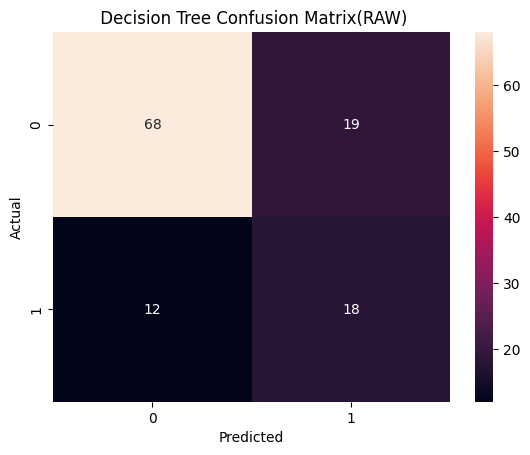

In [226]:
sns.heatmap(cm_dt_raw, annot=True)
plt.title(" Decision Tree Confusion Matrix(RAW)")
plt.xlabel("Predicted")
plt.ylabel("Actual")

# Image ko save karna
plt.savefig("confusion_matrix_dt_raw.png", dpi=300, bbox_inches='tight')  # filename, resolution, layout tight

In [227]:
dt_prob_raw = dt_r.predict_proba(x_test)[:, 1]
fpr_dt_raw, tpr_dt_raw, thresholds_dt_raw = roc_curve(y_test, dt_prob_raw, pos_label=2)
roc_auc_dt_raw = auc(fpr_dt_raw, tpr_dt_raw)

C:\Users\abuba\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


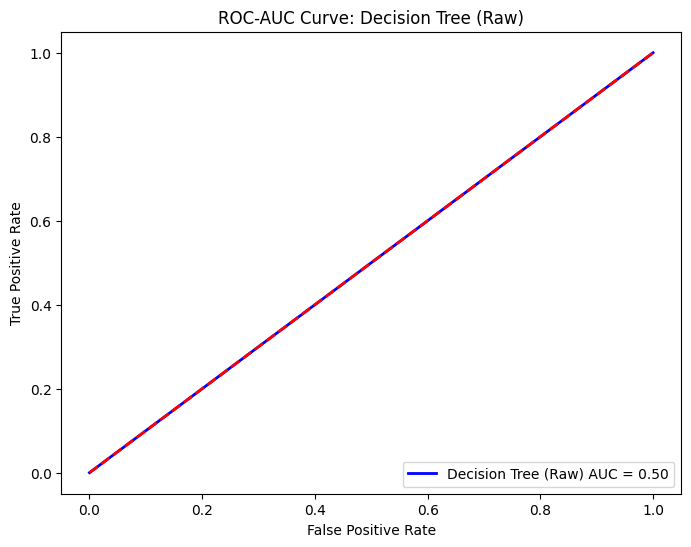

In [229]:
plt.figure(figsize=(8,6))
plt.plot(fpr_dt_raw, tpr_dt_raw, color='blue', lw=2, label='Decision Tree (Raw) AUC = %0.2f' % roc_auc_dt_raw)
plt.plot([0,1], [0,1], color='red', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curve: Decision Tree (Raw)')
plt.legend(loc='lower right')
plt.savefig("ROC_DT_raw.png", dpi=300, bbox_inches='tight')

plt.show()

**Random Forest**

In [230]:
rf_r=RandomForestClassifier()

In [231]:
rf_r.fit(x_train_raw, y_train_raw)

RandomForestClassifier()

In [232]:
rf_predict_raw=rf_r.predict(x_test_raw)

In [233]:
rf_accuracy_raw=accuracy_score(y_test_raw, rf_predict_raw)

In [234]:
rf_report_raw=classification_report(y_test_raw, rf_predict_raw, output_dict=True)

In [235]:
cm_rf_raw=confusion_matrix(y_test_raw, rf_predict_raw)

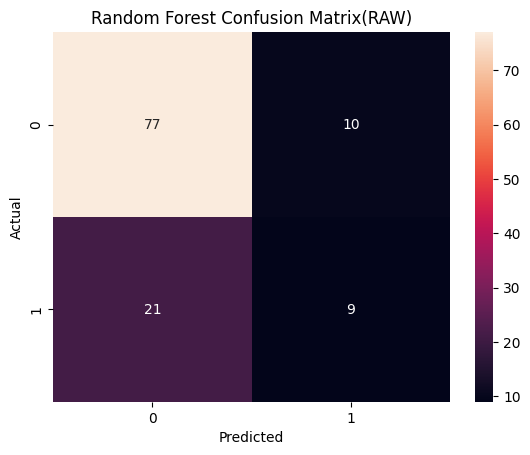

In [236]:
sns.heatmap(cm_rf_raw, annot=True)
plt.title("Random Forest Confusion Matrix(RAW)")
plt.xlabel("Predicted")
plt.ylabel("Actual")

# Image ko save karna
plt.savefig("confusion_matrix_rf_raw.png", dpi=300, bbox_inches='tight')  # filename, resolution, layout tight

In [237]:
rf_prob_raw = rf_r.predict_proba(x_test)[:, 1]
fpr_rf_raw, tpr_rf_raw, thresholds_rf_raw = roc_curve(y_test, rf_prob_raw, pos_label=2)
roc_auc_rf_raw = auc(fpr_rf_raw, tpr_rf_raw)

C:\Users\abuba\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


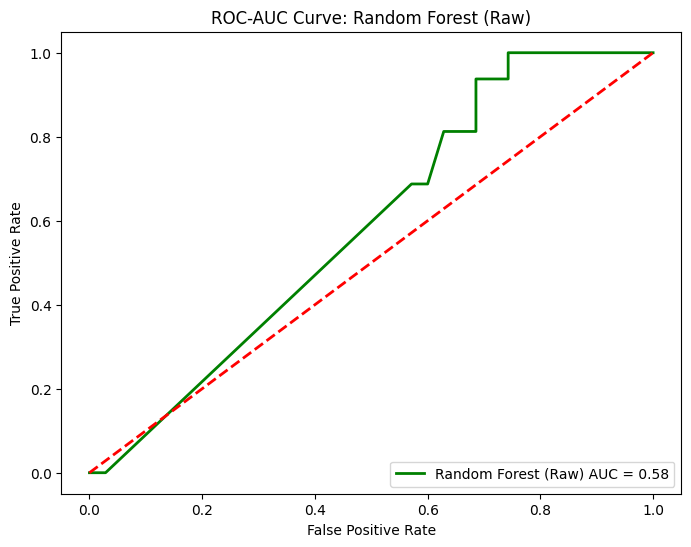

In [238]:
plt.figure(figsize=(8,6))
plt.plot(fpr_rf_raw, tpr_rf_raw, color='green', lw=2, label='Random Forest (Raw) AUC = %0.2f' % roc_auc_rf_raw)
plt.plot([0,1], [0,1], color='red', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curve: Random Forest (Raw)')
plt.legend(loc='lower right')
plt.savefig("ROC_rf_raw.png", dpi=300, bbox_inches='tight')

plt.show()

**Logistic Regression**

In [239]:
lr_r=LogisticRegression(max_iter=1000)

In [240]:
lr_r.fit(x_train_raw, y_train_raw)

LogisticRegression(max_iter=1000)

In [241]:
lr_predict_raw=lr_r.predict(x_test_raw)

In [242]:
lr_accuracy_raw=accuracy_score(y_test_raw, lr_predict_raw)

In [243]:
lr_report_raw=classification_report(y_test_raw, lr_predict_raw, output_dict=True)

In [244]:
lr_cm_raw=confusion_matrix(y_test_raw, lr_predict_raw)

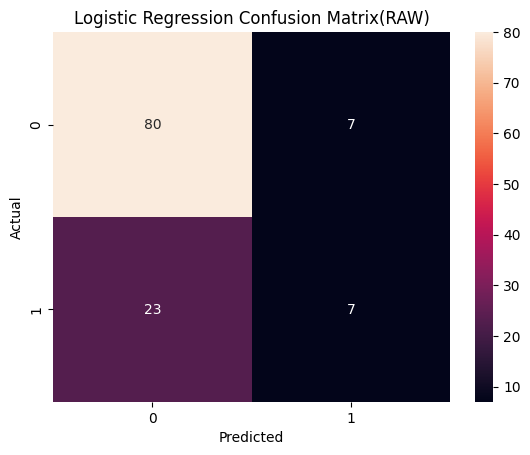

In [245]:
sns.heatmap(lr_cm_raw, annot=True)
plt.title("Logistic Regression Confusion Matrix(RAW)")
plt.xlabel("Predicted")
plt.ylabel("Actual")

# Image ko save karna
plt.savefig("confusion_matrix_lr_raw.png", dpi=300, bbox_inches='tight')  # filename, resolution, layout tight

In [246]:
lr_prob_raw = lr_r.predict_proba(x_test)[:, 1]
fpr_lr_raw, tpr_lr_raw, thresholds_lr_raw = roc_curve(y_test, lr_prob_raw, pos_label=2)
roc_auc_lr_raw = auc(fpr_lr_raw, tpr_lr_raw)

C:\Users\abuba\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


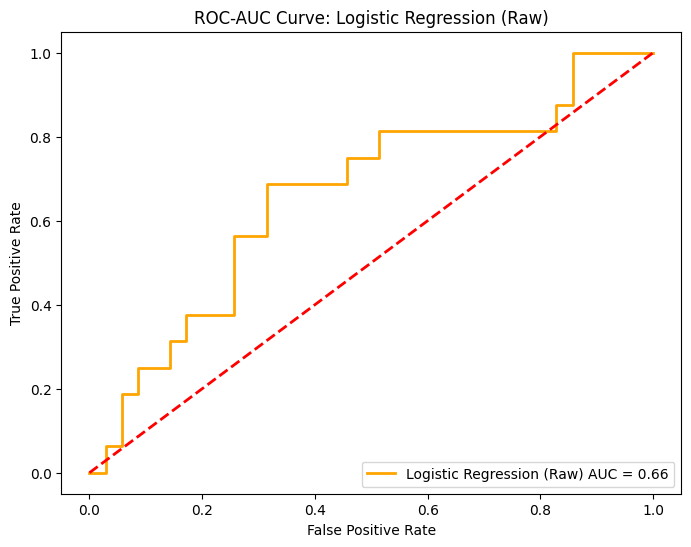

In [247]:
plt.figure(figsize=(8,6))
plt.plot(fpr_lr_raw, tpr_lr_raw, color='orange', lw=2, label='Logistic Regression (Raw) AUC = %0.2f' % roc_auc_lr_raw)
plt.plot([0,1], [0,1], color='red', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curve: Logistic Regression (Raw)')
plt.legend(loc='lower right')
plt.savefig("ROC_lr_raw.png", dpi=300, bbox_inches='tight')

plt.show()

**K-Nearest Neighbors (KNN)**

In [248]:
knn_r=KNeighborsClassifier()

In [249]:
knn_r.fit(x_train_raw, y_train_raw)

KNeighborsClassifier()

In [250]:
knn_predict_raw=knn_r.predict(x_test_raw)

In [251]:
knn_accuracy_raw=accuracy_score(y_test_raw, knn_predict_raw)

In [252]:
knn_report_raw=classification_report(y_test_raw, knn_predict_raw, output_dict=True)

In [253]:
cm_knn_raw=confusion_matrix(y_test_raw, knn_predict_raw)

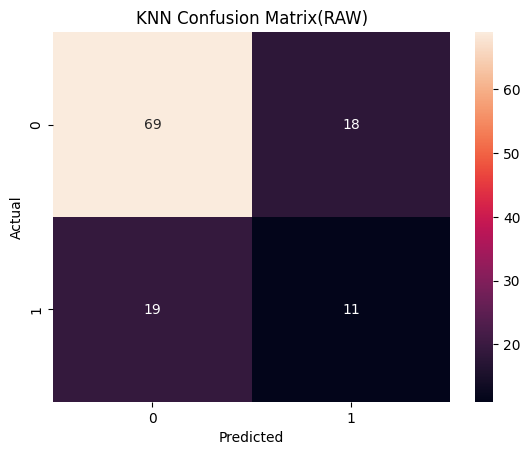

In [254]:
sns.heatmap(cm_knn_raw, annot=True)
plt.title("KNN Confusion Matrix(RAW)")
plt.xlabel("Predicted")
plt.ylabel("Actual")

# Image ko save karna
plt.savefig("confusion_matrix_KNN_raw.png", dpi=300, bbox_inches='tight')  # filename, resolution, layout tight

In [255]:
knn_prob_raw = knn_r.predict_proba(x_test)[:, 1]
fpr_knn_raw, tpr_knn_raw, thresholds_knn_raw = roc_curve(y_test, knn_prob_raw, pos_label=2)
roc_auc_knn_raw = auc(fpr_knn_raw, tpr_knn_raw)

C:\Users\abuba\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


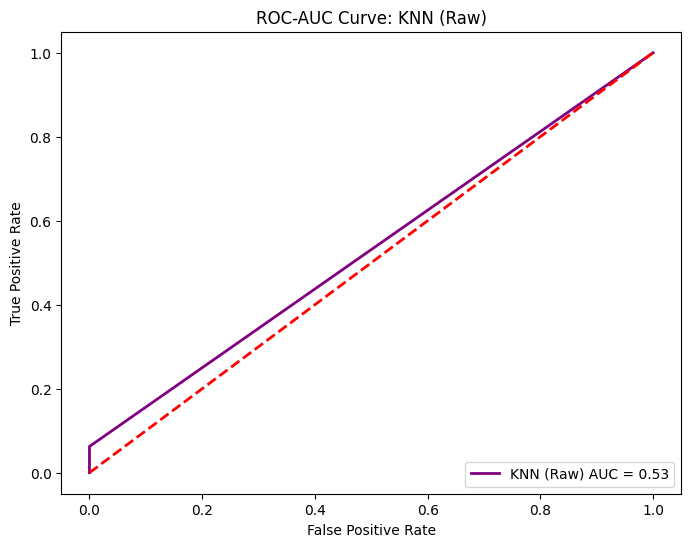

In [256]:
plt.figure(figsize=(8,6))
plt.plot(fpr_knn_raw, tpr_knn_raw, color='purple', lw=2, label='KNN (Raw) AUC = %0.2f' % roc_auc_knn_raw)
plt.plot([0,1], [0,1], color='red', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curve: KNN (Raw)')
plt.legend(loc='lower right')
plt.savefig("ROC_knn_raw.png", dpi=300, bbox_inches='tight')

plt.show()

**Support Vector Machine(SVM)**

In [257]:
svm_r=SVC(probability=True)

In [258]:
svm_r.fit(x_train_raw, y_train_raw)

SVC(probability=True)

In [259]:
svm_predict_raw=svm_r.predict(x_test_raw)

In [260]:
svm_accuracy_raw=accuracy_score(y_test_raw, svm_predict_raw)

In [261]:
svm_report_raw=classification_report(y_test_raw, svm_predict_raw, output_dict=True)

C:\Users\abuba\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\abuba\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\abuba\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(ave

In [262]:
svm_cm_raw=confusion_matrix(y_test_raw, svm_predict_raw)

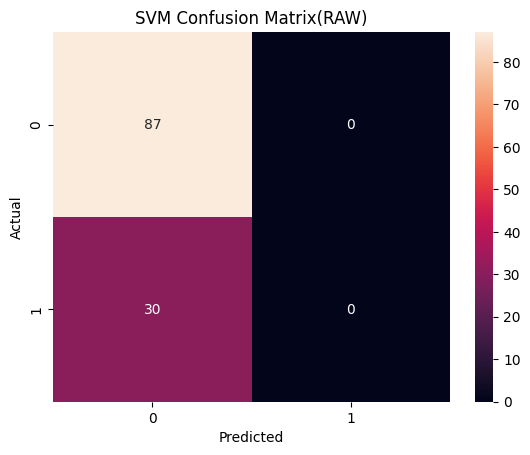

In [263]:
sns.heatmap(svm_cm_raw, annot=True)
plt.title("SVM Confusion Matrix(RAW)")
plt.xlabel("Predicted")
plt.ylabel("Actual")

# Image ko save karna
plt.savefig("confusion_matrix_svm_raw.png", dpi=300, bbox_inches='tight')  # filename, resolution, layout tight

In [264]:
svm_prob_raw = svm_r.predict_proba(x_test)[:, 1]  # probability=True must be set
fpr_svm_raw, tpr_svm_raw, thresholds_svm_raw = roc_curve(y_test, svm_prob_raw, pos_label=2)
roc_auc_svm_raw = auc(fpr_svm_raw, tpr_svm_raw)

C:\Users\abuba\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


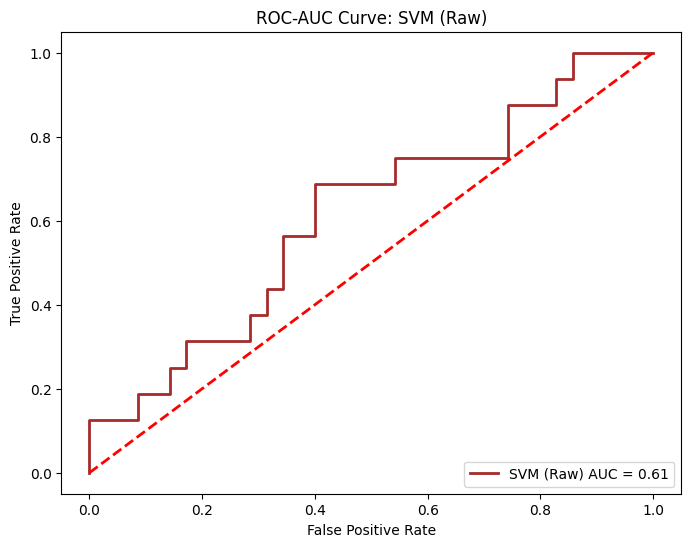

In [266]:
plt.figure(figsize=(8,6))
plt.plot(fpr_svm_raw, tpr_svm_raw, color='brown', lw=2, label='SVM (Raw) AUC = %0.2f' % roc_auc_svm_raw)
plt.plot([0,1], [0,1], color='red', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curve: SVM (Raw)')
plt.legend(loc='lower right')
plt.savefig("ROC_SVM_raw.png", dpi=300, bbox_inches='tight')

plt.show()

**Naive Bayes**

In [267]:
nb_r=GaussianNB()

In [268]:
nb_r.fit(x_train_raw, y_train_raw)

GaussianNB()

In [269]:
nb_predict_raw=nb_r.predict(x_test_raw)

In [270]:
nb_accuracy_raw=accuracy_score(y_test_raw, nb_predict_raw)

In [271]:
nb_report_raw=classification_report(y_test_raw, nb_predict_raw, output_dict=True)

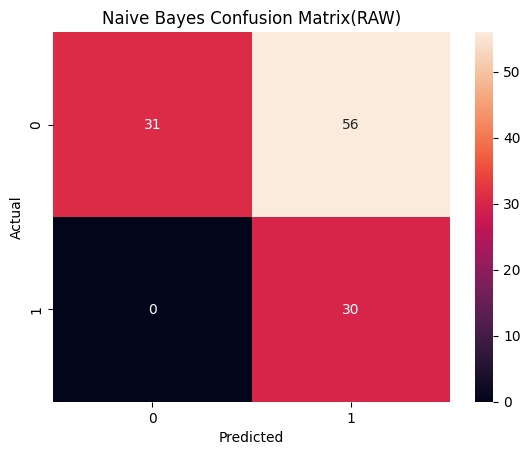

In [272]:
sns.heatmap(confusion_matrix(y_test_raw, nb_predict_raw), annot=True)
plt.title("Naive Bayes Confusion Matrix(RAW)")
plt.xlabel("Predicted")
plt.ylabel("Actual")

# Image ko save karna
plt.savefig("confusion_matrix_nb_raw.png", dpi=300, bbox_inches='tight')  # filename, resolution, layout tight

In [273]:
nb_prob_raw = nb_r.predict_proba(x_test)[:, 1]
fpr_nb_raw, tpr_nb_raw, thresholds_nb_raw = roc_curve(y_test, nb_prob_raw, pos_label=2)
roc_auc_nb_raw = auc(fpr_nb_raw, tpr_nb_raw)

C:\Users\abuba\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


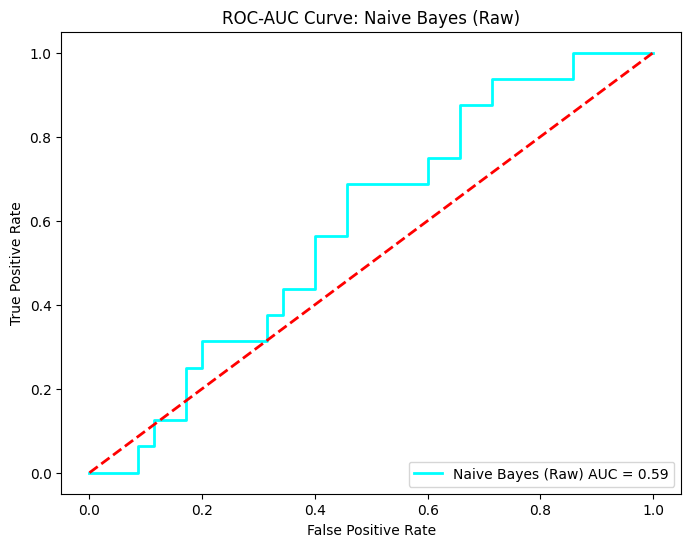

In [274]:
plt.figure(figsize=(8,6))
plt.plot(fpr_nb_raw, tpr_nb_raw, color='cyan', lw=2, label='Naive Bayes (Raw) AUC = %0.2f' % roc_auc_nb_raw)
plt.plot([0,1], [0,1], color='red', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curve: Naive Bayes (Raw)')
plt.legend(loc='lower right')
plt.savefig("ROC_nb_raw.png", dpi=300, bbox_inches='tight')

plt.show()


# **Evaluation Of Model Without Preprocessing**

In [275]:
comparison_raw = pd.DataFrame({
    "Model": ["DT_Raw", "RF_Raw", "LR_Raw", "KNN_Raw", "SVM_Raw", "NB_Raw"],
    "Precision": [
        dt_report_raw["weighted avg"]["precision"],
        rf_report_raw["weighted avg"]["precision"],
        lr_report_raw["weighted avg"]["precision"],
        knn_report_raw["weighted avg"]["precision"],
        svm_report_raw["weighted avg"]["precision"],
        nb_report_raw["weighted avg"]["precision"]
    ],
    "Recall": [
        dt_report_raw["weighted avg"]["recall"],
        rf_report_raw["weighted avg"]["recall"],
        lr_report_raw["weighted avg"]["recall"],
        knn_report_raw["weighted avg"]["recall"],
        svm_report_raw["weighted avg"]["recall"],
        nb_report_raw["weighted avg"]["recall"]
    ],
    "F1-Score": [
        dt_report_raw["weighted avg"]["f1-score"],
        rf_report_raw["weighted avg"]["f1-score"],
        lr_report_raw["weighted avg"]["f1-score"],
        knn_report_raw["weighted avg"]["f1-score"],
        svm_report_raw["weighted avg"]["f1-score"],
        nb_report_raw["weighted avg"]["f1-score"]
    ],
    "Accuracy": [
        dt_report_raw["accuracy"],
        rf_report_raw["accuracy"],
        lr_report_raw["accuracy"],
        knn_report_raw["accuracy"],
        svm_report_raw["accuracy"],
        nb_report_raw["accuracy"]
    ],
    "ROC-AUC": [
        roc_auc_dt_raw,
        roc_auc_rf_raw,
        roc_auc_lr_raw,
        roc_auc_knn_raw,
        roc_auc_svm_raw,
        roc_auc_nb_raw
    ]
})



**Comparison Table Without Preprocessing**

In [276]:
comparison_raw

Model  Precision    Recall  F1-Score  Accuracy   ROC-AUC
0   DT_Raw   0.756791  0.735043  0.743331  0.735043  0.500000
1   RF_Raw   0.705707  0.735043  0.713180  0.735043  0.584821
2   LR_Raw   0.705751  0.743590  0.707766  0.743590  0.658929
3  KNN_Raw   0.680301  0.683761  0.681984  0.683761  0.531250
4  SVM_Raw   0.552926  0.743590  0.634238  0.743590  0.612500
5   NB_Raw   0.833035  0.521368  0.523326  0.521368  0.587500

# **Combined Comparison Evaluation of With and Without Preprocessing Results**

**Comaprison Table**

In [277]:
comparison_raw["Type"] = "Raw"
comparison["Type"] = "Processed"
combined_comparison = pd.concat([comparison_raw, comparison], ignore_index=True)
combined_comparison[["Precision", "Recall", "F1-Score", "Accuracy"]] = \
    combined_comparison[["Precision", "Recall", "F1-Score", "Accuracy"]].round(3)

combined_comparison


Model  Precision  Recall  F1-Score  Accuracy   ROC-AUC       Type
0    DT_Raw      0.757   0.735     0.743     0.735  0.500000        Raw
1    RF_Raw      0.706   0.735     0.713     0.735  0.584821        Raw
2    LR_Raw      0.706   0.744     0.708     0.744  0.658929        Raw
3   KNN_Raw      0.680   0.684     0.682     0.684  0.531250        Raw
4   SVM_Raw      0.553   0.744     0.634     0.744  0.612500        Raw
5    NB_Raw      0.833   0.521     0.523     0.521  0.587500        Raw
6        DT      0.672   0.667     0.669     0.667  0.378571  Processed
7        RF      0.686   0.686     0.686     0.686  0.598214  Processed
8        LR      0.698   0.686     0.691     0.686  0.617857  Processed
9       KNN      0.661   0.627     0.638     0.627  0.618750  Processed
10      SVM      0.647   0.647     0.647     0.647  0.650893  Processed
11       NB      0.586   0.451     0.455     0.451  0.614286  Processed

**Comaprison Graph**

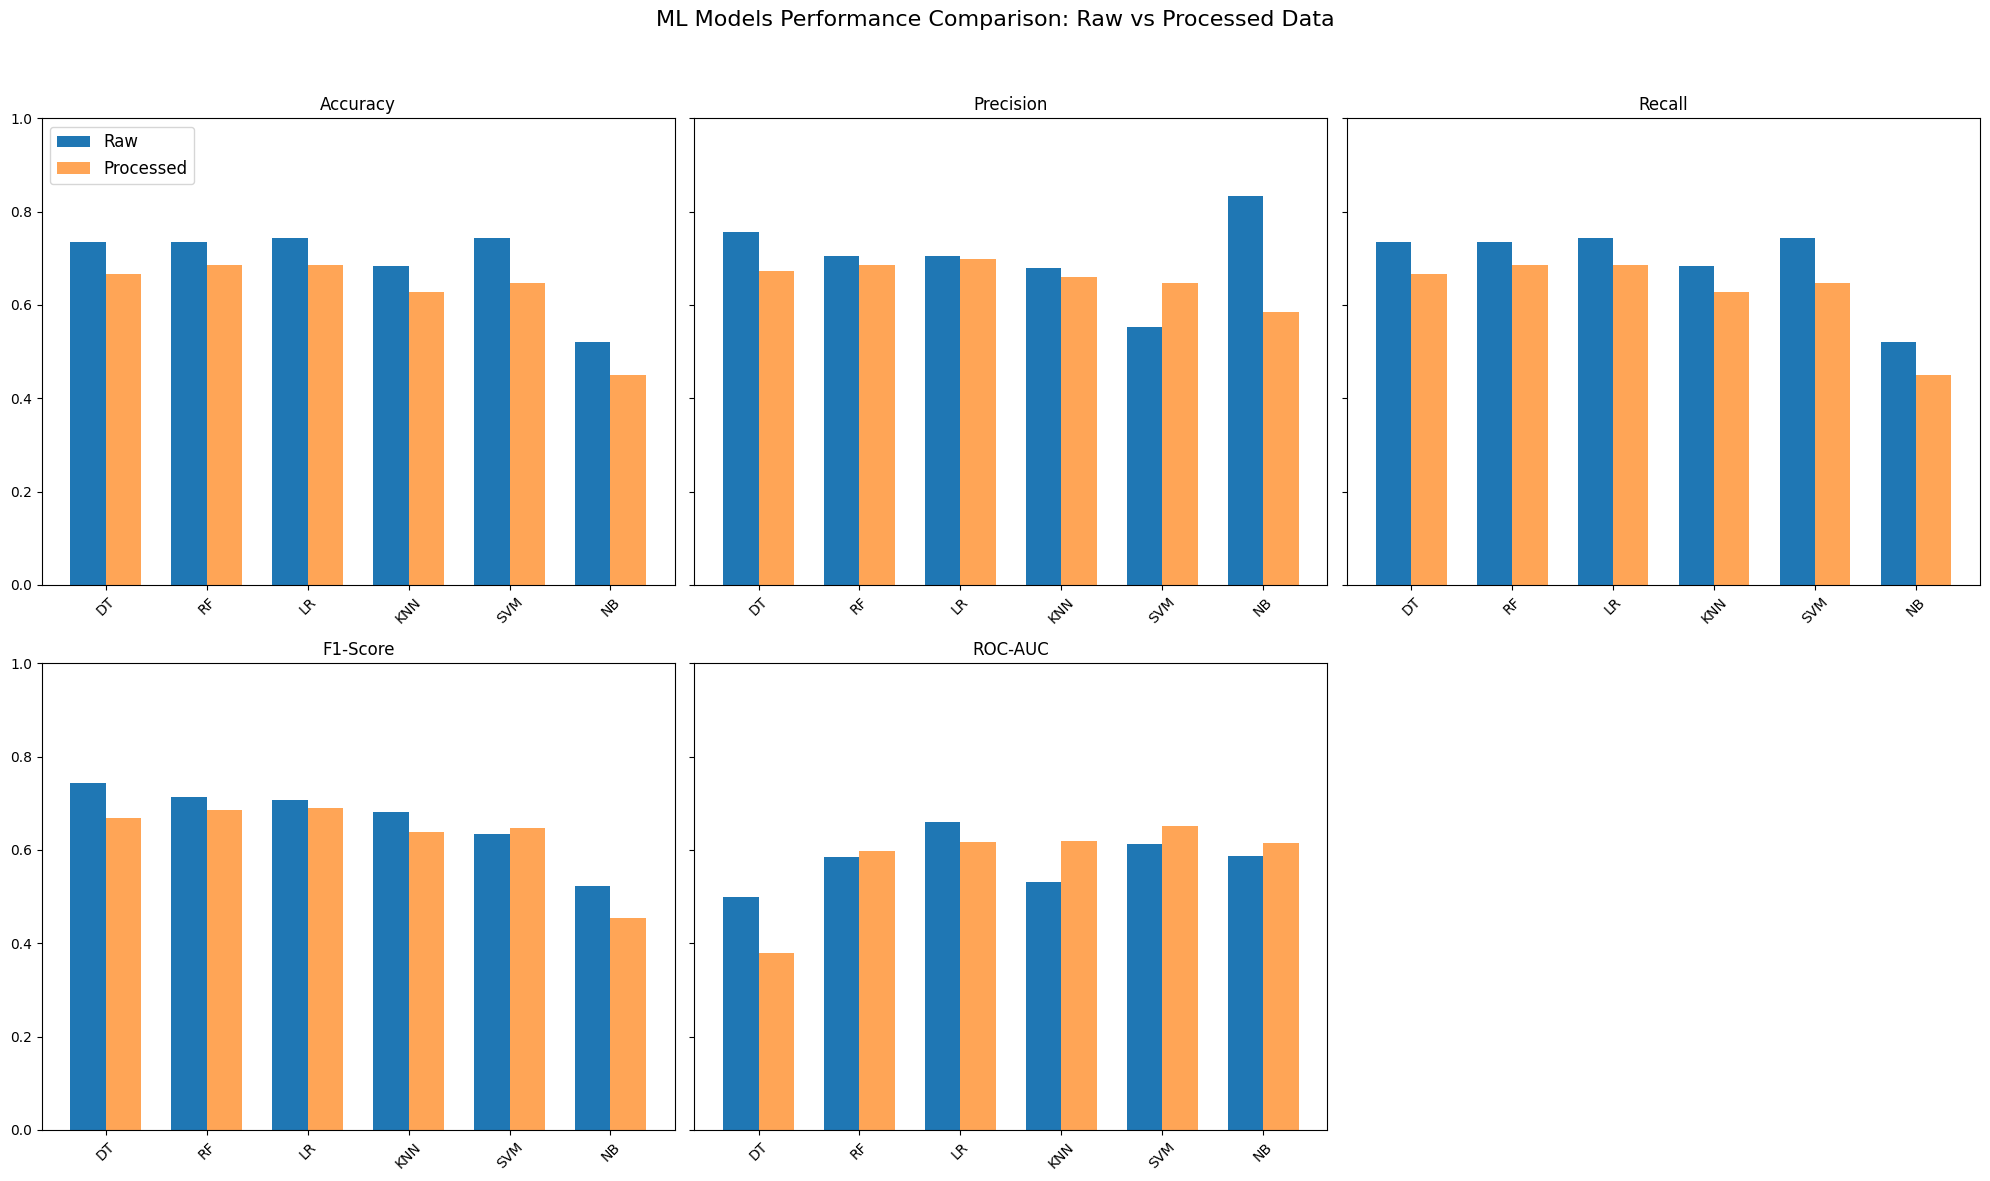

In [280]:
metrics = ["Accuracy", "Precision", "Recall", "F1-Score", "ROC-AUC"]
models = ["DT", "RF", "LR", "KNN", "SVM", "NB"]
x = np.arange(len(models))
width = 0.35

fig, axs = plt.subplots(2, 3, figsize=(20,12), sharey=True)
axs = axs.flatten()  # Flatten 2D array for easy indexing

for i, metric in enumerate(metrics):
    ax = axs[i]
    raw_values = combined_comparison[combined_comparison["Type"]=="Raw"][metric].values
    processed_values = combined_comparison[combined_comparison["Type"]=="Processed"][metric].values

    ax.bar(x - width/2, raw_values, width, label="Raw")
    ax.bar(x + width/2, processed_values, width, label="Processed", alpha=0.7)

    ax.set_xticks(x)
    ax.set_xticklabels(models, rotation=45, fontsize=10)
    ax.set_title(metric, fontsize=12)
    ax.set_ylim(0,1)

# Hide extra subplot if exists
if len(metrics) < len(axs):
    for j in range(len(metrics), len(axs)):
        axs[j].axis('off')

# Add legend to the **first subplot only** (top-left)
axs[0].legend(loc="upper left", fontsize=12)

# Add overall title
fig.suptitle("ML Models Performance Comparison: Raw vs Processed Data", fontsize=16)
plt.tight_layout(rect=[0,0,1,0.95])
plt.savefig("Combined graph.png", dpi=300, bbox_inches='tight')

plt.show()